In [ ]:
from IPython.display import display, HTML

<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
   1- Car Price Prediction.
</div>



<img src="download.jpeg" style="width: 500px; height: 200px;" />


<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
   2- Importing Liberary 
</div>

In [50]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle as pk 
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
  3- Reading the data
</div>

In [51]:
df = pd.read_csv("Cardetails.csv")

In [52]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<div style="color:blackF; font-family: Arial, sans-serif; background-color:##CBCE91FF; padding: 10px; font-size: 24px;">
    <h2>Feature Description</h2>
    <p><strong>name:</strong> The name of the car.</p>
    <p><strong>year:</strong> The manufacturing year of the car.</p>
    <p><strong>selling_price:</strong> The price of the car.</p>
    <p><strong>km_driven:</strong> The number of kilometers the car has been driven.</p>
    <p><strong>fuel:</strong> The type of fuel used by the car (e.g., Diesel, Petrol).</p>
    <p><strong>seller_type:</strong> The type of seller (e.g., Individual, Dealer).</p>
    <p><strong>transmission:</strong> The type of transmission (e.g., Automatic, Manual).</p>
    <p><strong>owner:</strong> The number of previous owners of the car.</p>
    <p><strong>mileage:</strong> The number of kilometers the car can travel per liter of fuel.</p>
    <p><strong>engine:</strong> The engine capacity in cubic centimeters (CC).</p>
    <p><strong>max_power:</strong> The maximum power of the engine in horsepower (bhp).</p>
    <p><strong>torque:</strong> The engine torque.</p>
    <p><strong>seats:</strong> The seating capacity of the car.</p>
</div>


<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    4- Data Shape and Information
</div>


In [53]:
df.shape

(8128, 13)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    5-Data Cleaning
</div>

In [55]:
df.drop(columns=["torque"], inplace =True)

In [56]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    6-Data Description
</div>


In [57]:
df.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
   7- check  for null
</div>


In [58]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [59]:
# the percentage of null from the total data set
## the Rule of thumb say that if we are deopping or removing 5% or less of the original data we are safe to drop them 
(221/df.shape[0])*100

2.718996062992126

In [60]:
df.dropna(inplace = True)

<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    8- Check for Duplicates 
</div>

In [61]:
df.duplicated().sum()


1189

In [62]:
df.shape[0]

7907

In [63]:
df.drop_duplicates(inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    9-Visualize Car Prices
</div>

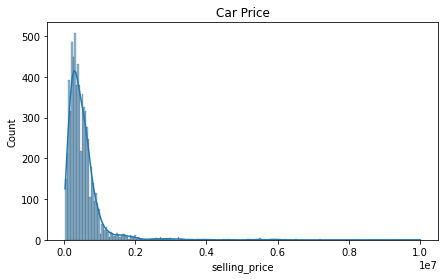

In [65]:

plt.figure(figsize=(7, 4))

sns.histplot(df["selling_price"], kde=True)

plt.title("Car Price")
plt.show()


In [66]:
#q=df["selling_price"].quantile(q=0.95) 

In [67]:
#df =df[df["selling_price"]<q]

<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    10- Data Preprocessing
</div>

In [68]:
for col in df.columns:
    print("The value of Unique value:" +col)
    print(df[col].unique())
    print("----------------------------------\n")

The value of Unique value:name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
----------------------------------

The value of Unique value:year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
----------------------------------

The value of Unique value:selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   

<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
     Function to split columns content
</div>

In [69]:
def brand(df_brand):
    brand =df_brand.split(" ")[0]
    return brand.strip()


In [70]:
def brand_float(df_brand):
    brand =df_brand.split(" ")[0]
    brand =brand.strip()
    if brand == "":
        brand=0
    return float(brand)

<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    Applying the function & Replacing the values 
</div>

In [71]:
df["name"]= df["name"].apply(brand)

In [72]:
df["name"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [73]:
df["mileage"]= df["mileage"].apply(brand_float)

In [74]:
df["max_power"]= df["max_power"].apply(brand_float)

In [75]:
df["engine"]= df["engine"].apply(brand_float)

In [76]:
df["name"].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],inplace= True)

In [77]:
df["name"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [78]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [79]:
df["transmission"].replace(['Manual', 'Automatic'],[1,2],inplace =True)

In [80]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [81]:
df["seller_type"].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3],inplace= True)

In [82]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [83]:
df["fuel"].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4],inplace= True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.3+ KB


In [85]:
df["owner"].unique()


array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [86]:
df["owner"].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'] ,[1,2,3,4,5],inplace=True)

In [87]:
df.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,6718.000000,6718.000000,6.718000e+03,6.718000e+03,6718.000000,6718.000000,6718.000000,6718.000000,6718.00000,6718.000000,6718.000000,6718.000000
mean,5.349360,2013.609110,5.263196e+05,7.340230e+04,1.476183,1.107175,1.085591,1.500149,19.46531,1430.891337,87.753036,5.434653
std,4.611335,3.900648,5.235398e+05,5.869980e+04,0.553480,0.322090,0.279780,0.737710,4.04915,493.493277,31.740261,0.984230
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.00000,624.000000,0.000000,2.000000
25%,1.000000,2011.000000,2.500000e+05,3.800000e+04,1.000000,1.000000,1.000000,1.000000,16.80000,1197.000000,67.100000,5.000000
50%,4.000000,2014.000000,4.200000e+05,6.822150e+04,1.000000,1.000000,1.000000,1.000000,19.44000,1248.000000,81.830000,5.000000
75%,8.000000,2017.000000,6.500000e+05,1.000000e+05,2.000000,1.000000,1.000000,2.000000,22.50000,1498.000000,100.000000,5.000000
max,31.000000,2020.000000,1.000000e+07,2.360457e+06,4.000000,3.000000,2.000000,5.000000,42.00000,3604.000000,400.000000,14.000000


<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    11- Visiualization  
</div>


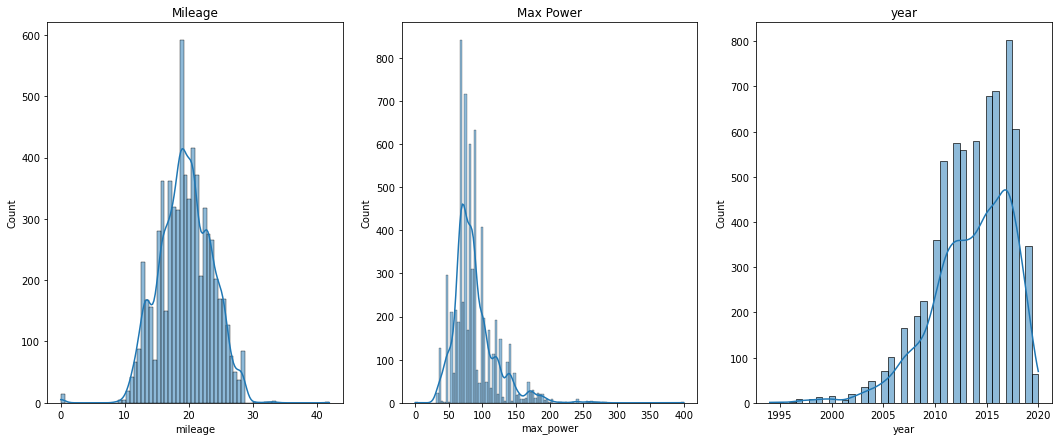

In [88]:
plt.figure(figsize=(18, 7))

# First subplot for mileage
plt.subplot(1,3, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df["mileage"], kde=True)
plt.title("Mileage")

# Second subplot for max_power
plt.subplot(1, 3, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df["max_power"], kde=True)
plt.title("Max Power")

# Second subplot for max_power
plt.subplot(1, 3, 3)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df["year"], kde=True)
plt.title("year")
plt.show()


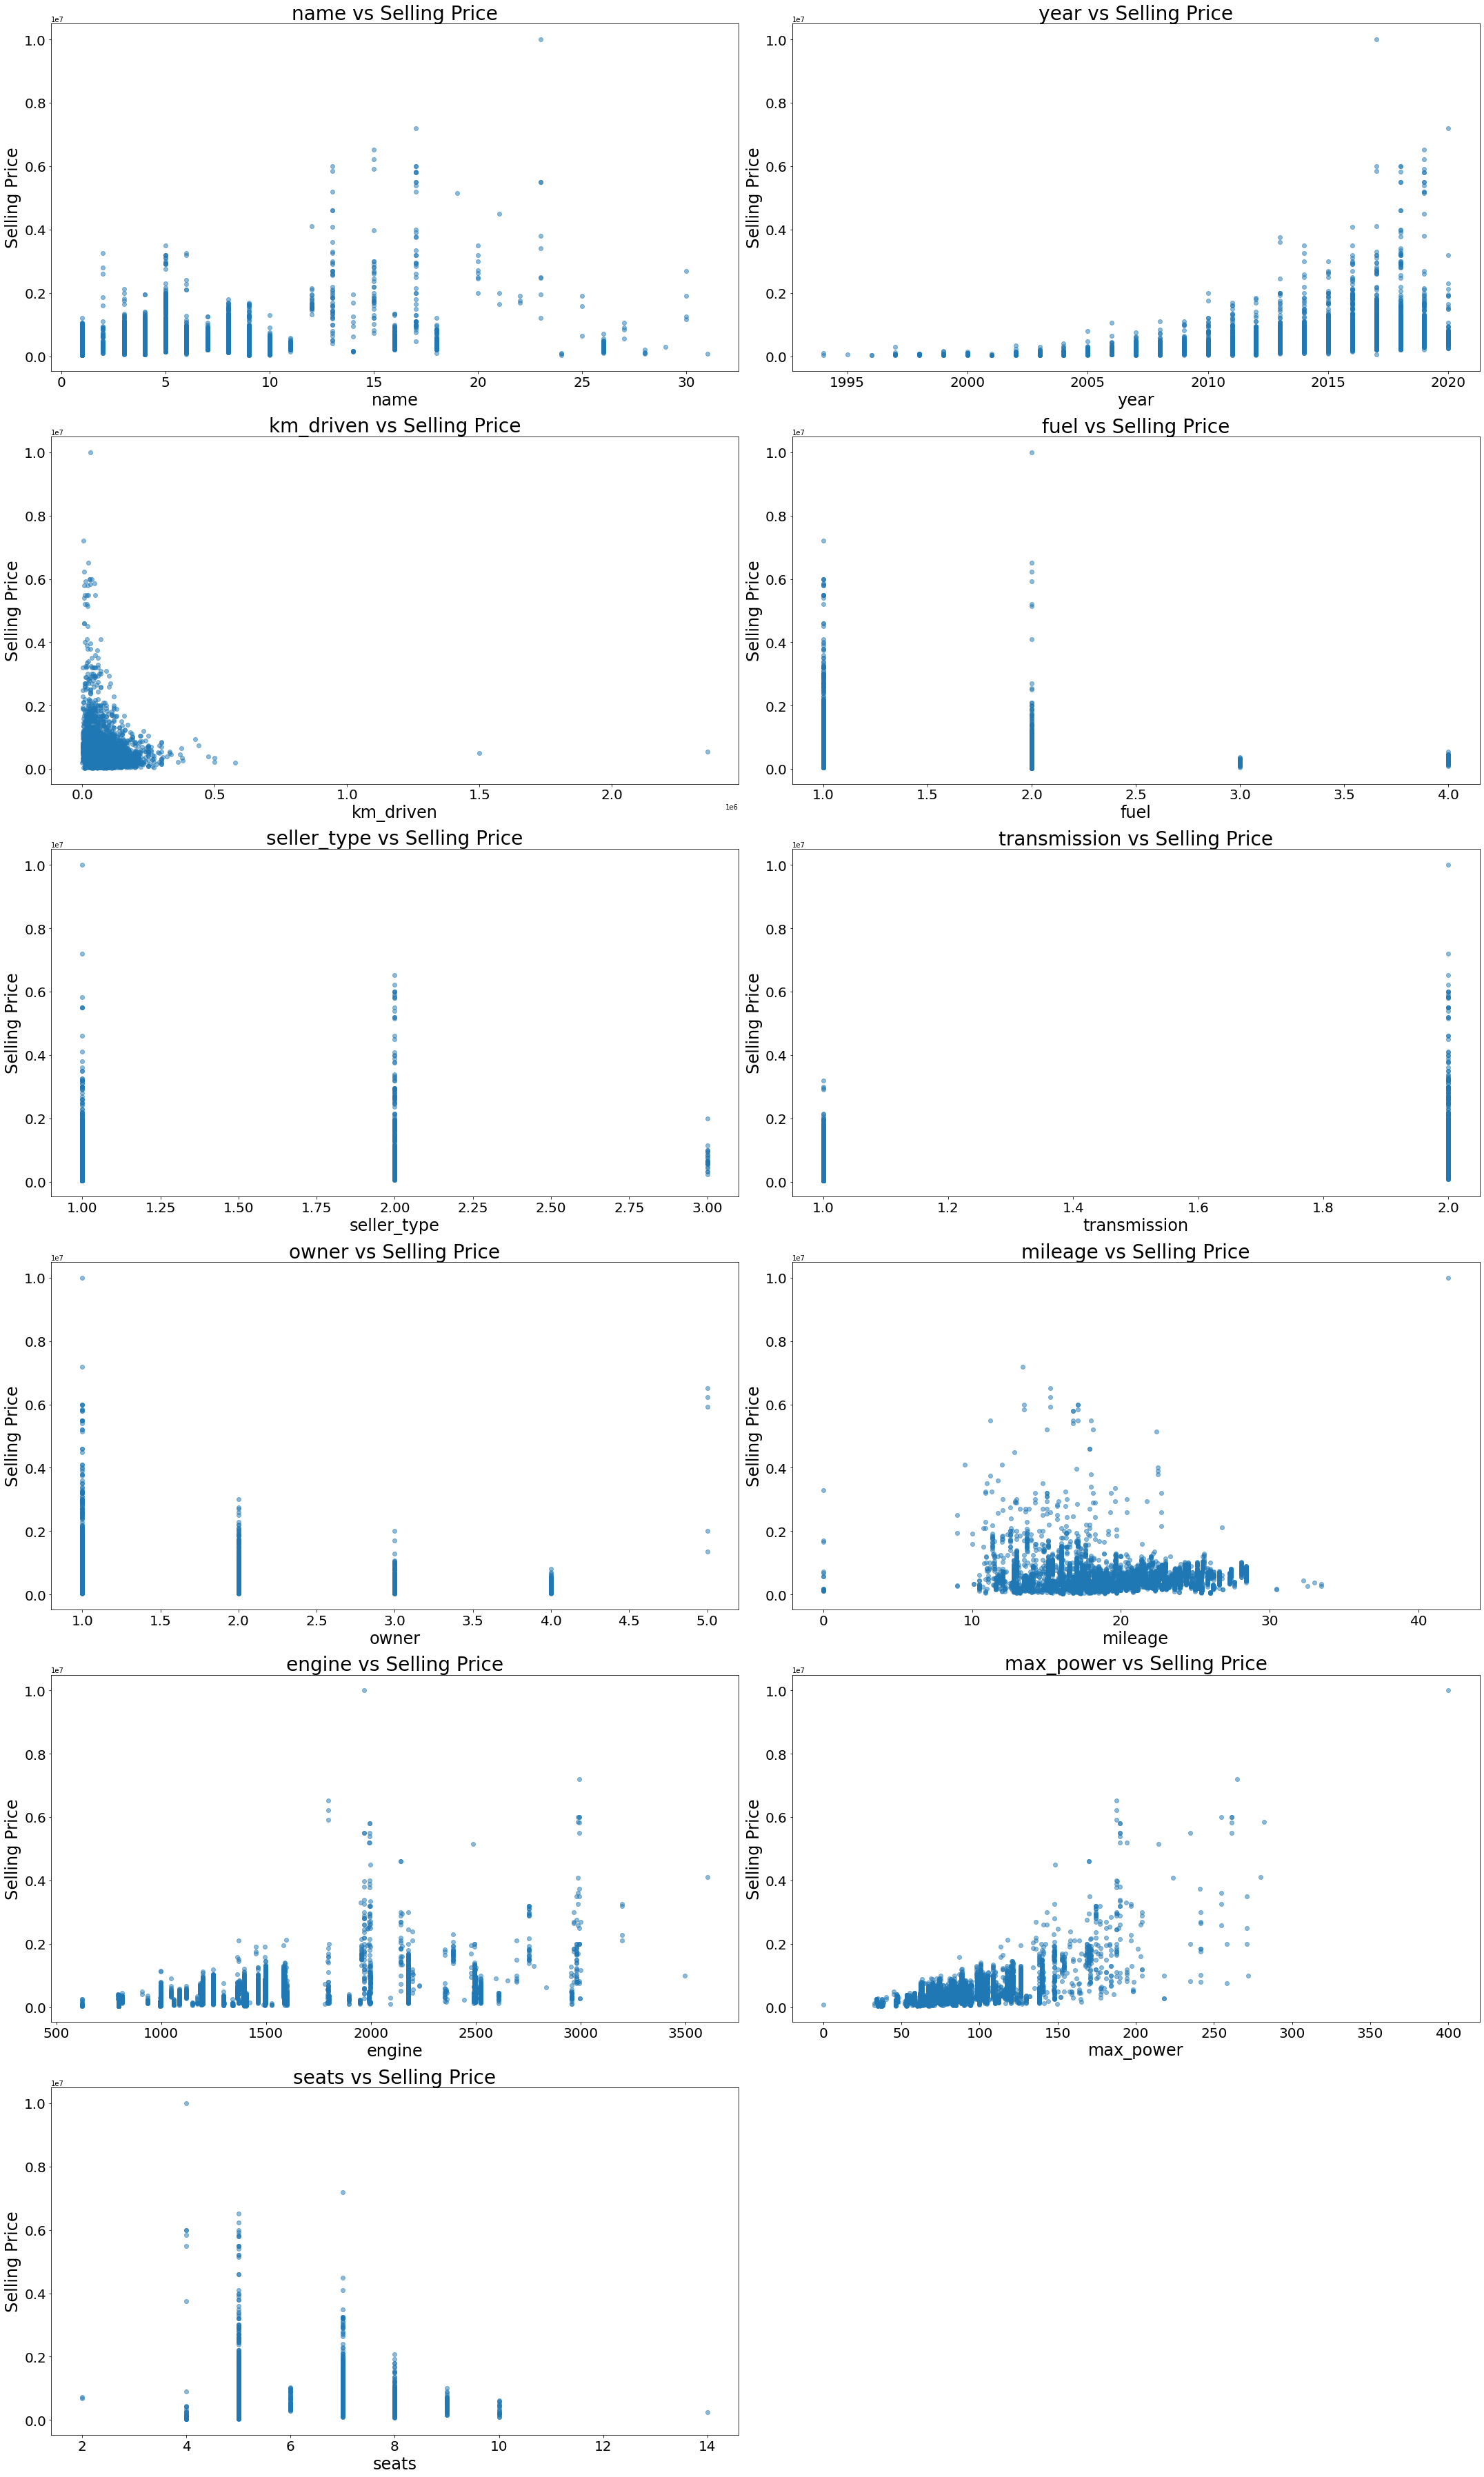

In [89]:
import matplotlib.pyplot as plt

features = df.columns.drop("selling_price")

# Increase the figure size
plt.figure(figsize=(30, 50))  # Adjust the figure size as needed

# Loop through each feature and create a subplot
for i, feature in enumerate(features):
    plt.subplot((len(features) + 1) // 2, 2, i + 1)  # 2 columns
    plt.scatter(df[feature], df["selling_price"], alpha=0.5)
    plt.title(f'{feature} vs Selling Price', fontsize=28)  # Increase title size
    plt.xlabel(feature, fontsize=24)  # Increase x-label size
    plt.ylabel('Selling Price', fontsize=24)  # Increase y-label size
    plt.xticks(fontsize=20)  # Increase x-tick size
    plt.yticks(fontsize=20)  # Increase y-tick size

plt.tight_layout()
plt.show()


<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    12- Remove outliers using IQR
</div>

In [90]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

df = remove_outliers(df, "max_power")
df = remove_outliers(df, "year")


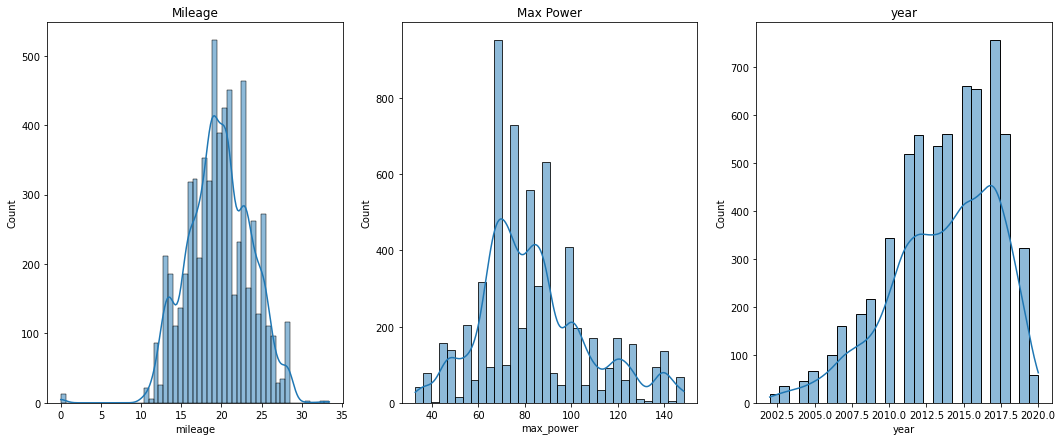

In [91]:
plt.figure(figsize=(18, 7))

# First subplot for mileage
plt.subplot(1,3, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df["mileage"], kde=True)
plt.title("Mileage")

# Second subplot for max_power
plt.subplot(1, 3, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df["max_power"], kde=True)
plt.title("Max Power")

# Second subplot for max_power
plt.subplot(1, 3, 3)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df["year"], kde=True)
plt.title("year")
plt.show()

In [92]:
df.describe()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,6357.000000,6357.000000,6.357000e+03,6.357000e+03,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000
mean,5.081485,2013.691678,4.605291e+05,7.365283e+04,1.485921,1.096429,1.056473,1.498034,19.729794,1390.256253,83.548538,5.425515
std,4.321704,3.657705,2.947842e+05,5.919398e+04,0.555876,0.308748,0.230851,0.731519,3.923045,449.481990,23.465891,0.975952
min,1.000000,2002.000000,3.150400e+04,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,624.000000,32.800000,2.000000
25%,1.000000,2011.000000,2.500000e+05,3.800000e+04,1.000000,1.000000,1.000000,1.000000,17.000000,1196.000000,67.100000,5.000000
50%,4.000000,2014.000000,4.000000e+05,7.000000e+04,1.000000,1.000000,1.000000,1.000000,19.700000,1248.000000,81.800000,5.000000
75%,8.000000,2017.000000,6.100000e+05,1.000000e+05,2.000000,1.000000,1.000000,2.000000,22.700000,1498.000000,98.600000,5.000000
max,30.000000,2020.000000,4.500000e+06,2.360457e+06,4.000000,3.000000,2.000000,5.000000,33.440000,2956.000000,148.310000,14.000000


In [93]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0


<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    13-Feature Engineering 
</div>

In [94]:
df_input = df.drop(columns= ["selling_price"])
df_output =df["selling_price"]

In [95]:
x_train,x_test,y_train,y_test = train_test_split(df_input,df_output,test_size= 0.2)

<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    14-XGBoost Model Training
</div>

In [96]:

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)
xg_final=xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)
# error evaluation 
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the metrics for the XGBoost model
print(f"XGBoost Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"XGBoost Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"XGBoost R-squared (R²): {r2_xgb:.2f}")


XGBoost Mean Squared Error (MSE): 9635494740.99
XGBoost Root Mean Squared Error (RMSE): 98160.56
XGBoost R-squared (R²): 0.88


<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    15-Feature Importance Visualization & Comparison
</div>


<Figure size 720x576 with 0 Axes>

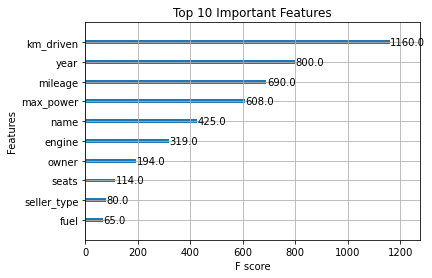

In [97]:

plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title('Top 10 Important Features')
plt.show()

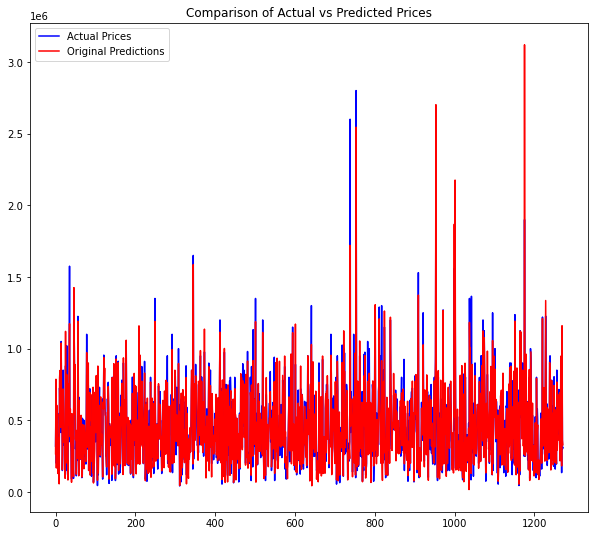

In [98]:

plt.figure(figsize=(10, 9))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred_xgb, label='Original Predictions', color='red')
plt.legend()
plt.title('Comparison of Actual vs Predicted Prices')
plt.show()

<div style="color:#EA738DFF; font-family: Arial, sans-serif; background-color:#CBCE91FF; padding: 10px; font-size: 24px;">
    16- Deployment
</div>

In [99]:
predect = xgb_model.predict(x_test)

In [100]:
predect

array([ 266686.4 ,  786317.8 ,  167527.25, ..., 1159670.1 ,  361978.44,
        330106.03], dtype=float32)

In [101]:
 pk.dump(xgb_model,open("model.pkl","wb"))

In [ ]:
# model = LinearRegression()
# model.fit(x_train, y_train)

# # Save the model using pickle
# y_pred_xgb = model.predict(x_test)
# # error evaluation 
# mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# rmse_xgb = np.sqrt(mse_xgb)
# r2_xgb = r2_score(y_test, y_pred_xgb)

# # Print the metrics for the XGBoost model
# print(f"XGBoost Mean Squared Error (MSE): {mse_xgb:.2f}")
# print(f"XGBoost Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
# print(f"XGBoost R-squared (R²): {r2_xgb:.2f}")

